## Example 1 (簡單線性回歸)
先從簡單的線性回歸舉例，![](https://chart.googleapis.com/chart?cht=tx&chl=y%20%3D%20ax%20%2B%20b) ，![](https://chart.googleapis.com/chart?cht=tx&chl=a) 稱為斜率，![](https://chart.googleapis.com/chart?cht=tx&chl=b) 稱為截距。

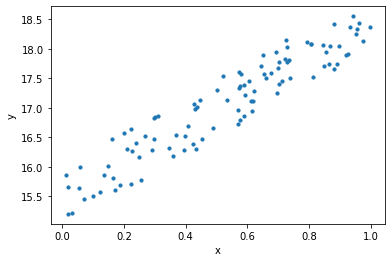

In [26]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# 亂數產生資料
np.random.seed(0)
noise = np.random.rand(100, 1)
x = np.random.rand(100, 1)
y = 3 * x + 15 + noise
# y=ax+b Target function  a=3, b=15


# plot
plt.scatter(x,y,s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Linear Regression
線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料。

Parameters:
- fit_intercept: 是否有截據，如果沒有則直線過原點。

Attributes:
- coef_: 取得斜率。
- intercept_: 取得截距。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x, y)

pred = model.predict(x)

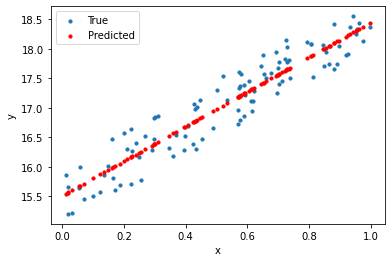

In [28]:
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, pred, color="r",s=10, label='Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [22]:
# 模型的斜率及截距，分別儲存在model.coef_[0] 和 model.intercept_中
coef = model.coef_ 
intercept = model.intercept_

print("斜率a = ",coef[0][0])
print("截距b = ",intercept[0])

斜率a =  2.931123354540896
截距b =  15.509166339414461


### Example 2 (多線性回歸)
多維回歸的線性模型，![](https://chart.googleapis.com/chart?cht=tx&chl=y%20%3D%20a0%20%2Ba1x1%2Ba2x2%2Ba3x3%2Ba4x4)... ，可以在y上建立多維的陣列。

In [4]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -1., 2.])

In [5]:
model.fit(X, y)
pred = model.predict(X)

In [6]:
print(model.intercept_)
print(model.coef_)

0.5000000000000089
[ 1.5 -1.   2. ]


## 非線性回歸
上面的例子資料都很均勻分布在一條直線上，但現實的資料可能並只會發生在一條線上。下面示範一個多項次的回歸模型例子。

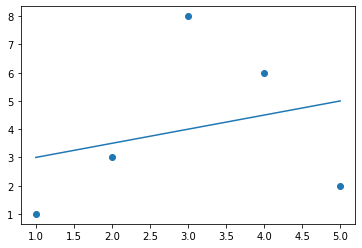

In [16]:
x = np.array([1,2,3,4,5])
y = np.array([1,3,8,6,2])
#原本shape為(5,),調整為(5,1)
x = x[:,np.newaxis]
#default為一元一次方程式
model = LinearRegression()
model.fit(x,y)
yfit = model.predict(x)
plt.scatter(x,y)
plt.plot(x,yfit)

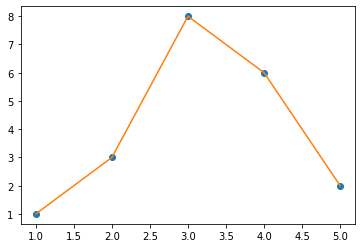

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

#先default要將degree設為多少
#make_pipeline是指可以將多個scikit learn的function一起執行
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
ypred=PolynomialRegression(degree=4).fit(x,y).predict(x)
plt.plot(x,y,'o')
plt.plot(x,ypred)

In [9]:
#隨機定義新的x,y值
# def make_data(N,err=1,rseed=42):
#     rng=np.random.RandomState(rseed)
#     x = rng.rand(N,1)**2
#     y = 10-1/(x.ravel()+0.1)
#     if err>0:
#         y+=err*rng.randn(N)
#     return x,y

In [10]:
x = np.array([[1.40280301e-01],[9.03857692e-01],[5.35815131e-01],[3.58391981e-01],[2.43418162e-02],[2.43342904e-02],[3.37370600e-03],[7.50261116e-01],[3.61339257e-01],[5.01366775e-01],[4.23721405e-04],[9.40725121e-01],[6.92960750e-01],[4.50878979e-02],[3.30603187e-02],[3.36372142e-02],[9.25633424e-02],[2.75369313e-01],[1.86576499e-01],[8.48144121e-02],[3.74363965e-01],[1.94585372e-02],[8.53484957e-02],[1.34221000e-01],[2.07999831e-01],[6.16501290e-01],[3.98696193e-02],[2.64437058e-01],[3.50955021e-01],[2.15764084e-03],[3.69110747e-01],[2.90784768e-02],[4.23170975e-03],[9.00383763e-01],[9.32445223e-01],[6.53506272e-01],[9.27895484e-02],[9.53984185e-03],[4.68174835e-01],[1.93734218e-01]])
y = np.array([ 5.82469676e+00,  7.94613194e+00,  9.24976070e+00,  6.59761731e+00,
        2.16651685e+00, -2.50365745e-03, -1.00182588e+00,  9.02075194e+00,
        8.57086436e+00,  8.50848958e+00, -7.34549241e-02,  8.73802779e+00,
        7.26038154e+00,  2.38778217e+00,  2.02397265e+00,  3.57417666e+00,
        5.15052189e+00,  5.57291682e+00,  6.83461431e+00,  4.20408429e+00,
        7.21499207e+00,  2.24057093e+00,  5.63575746e+00,  6.66180813e+00,
        5.91402744e+00,  8.29511673e+00,  3.18174801e+00,  8.23158707e+00,
        7.30330971e+00,  2.55480191e-02,  6.76197223e+00,  1.05656839e+00,
        1.21851645e+00,  1.03566236e+01,  8.95941549e+00,  9.67640393e+00,
        5.17463285e+00,  2.25781800e-01,  8.60137397e+00,  8.13359834e+00])

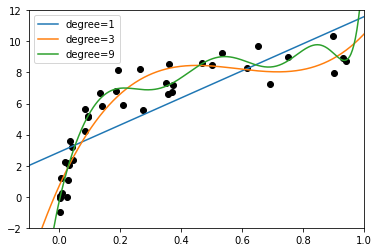

In [21]:
#測試資料集
x_test = np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(x.ravel(),y,color='black')
#測試1,3,7的degree
for degree in [1,3,9]:
    y_test=PolynomialRegression(degree).fit(x,y).predict(x_test)
    plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))
plt.xlim(-0.1,1.0)
plt.ylim(-2,12)
plt.legend(loc='best')